
# Data Visualization with Matplotlib - Exercises 2

จงทำตามคำสั่งต่อไปนี้ด้วย data ที่กำหนดให้ต่อไปนี้


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## อ่านไฟล์ Superstore.csv

In [6]:
df = pd.read_csv("Superstore.csv", encoding = "windows-1254")

In [7]:
df.head()

,Order ID,Customer Name,Segment,Day,Month,Year,Ship Mode,City,State,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,Claire Gute,Consumer,8,11,2016,Second Class,Henderson,Kentucky,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,Claire Gute,Consumer,8,11,2016,Second Class,Henderson,Kentucky,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,Darrin Van Huff,Corporate,12,6,2016,Second Class,Los Angeles,California,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,Sean O'Donnell,Consumer,11,10,2015,Standard Class,Fort Lauderdale,Florida,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,Sean O'Donnell,Consumer,11,10,2015,Standard Class,Fort Lauderdale,Florida,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Segment        9994 non-null   object 
 3   Day            9994 non-null   int64  
 4   Month          9994 non-null   int64  
 5   Year           9994 non-null   int64  
 6   Ship Mode      9994 non-null   object 
 7   City           9994 non-null   object 
 8   State          9994 non-null   object 
 9   Category       9994 non-null   object 
 10  Sub-Category   9994 non-null   object 
 11  Product Name   9994 non-null   object 
 12  Sales          9994 non-null   float64
 13  Quantity       9994 non-null   int64  
 14  Discount       9994 non-null   float64
 15  Profit         9994 non-null   float64
dtypes: float64(3), int64(4), object(9)
memory usage: 1.2+ MB


## Exercise 1

จงวาดกราฟแท่งแสดงรายได้ของปี 2014 - 2017 และตกแต่งให้สวยงาม


<BarContainer object of 4 artists>

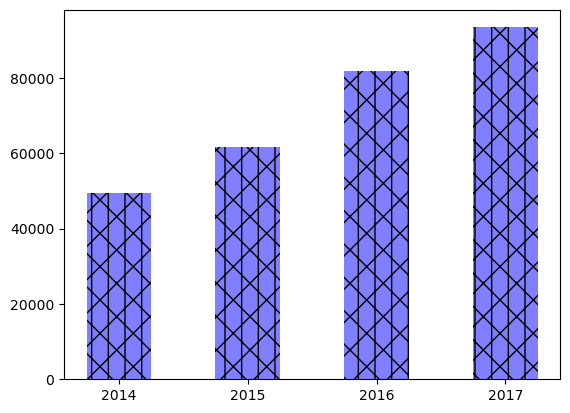

In [159]:
df1 = df.groupby('Year')['Profit'].sum()
plt.xticks(df1.index, [2014, 2015, 2016, 2017])
plt.bar(df1.index, df1, color = "b", alpha = .5, hatch = "\|/", width = .5)

## Exercise 2

จงวาดกราฟแท่งแสดงรายได้ของปี 2014 - 2017 ในกราฟเดียวแยกตามหมวดหมู่ พร้อมตกแต่งให้สวยงาม

<BarContainer object of 4 artists>

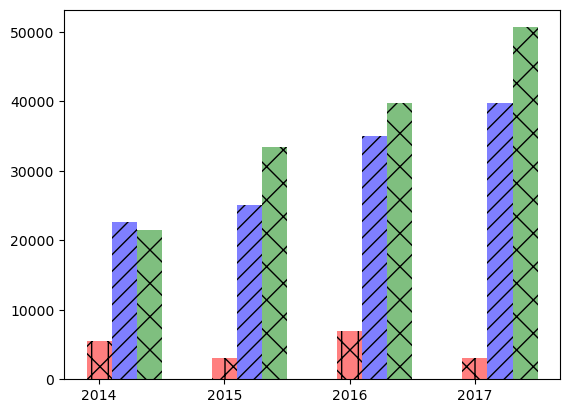

In [50]:
arr_df = {}
for i in range(0,df['Category'].nunique()) :
    arr_df[df['Category'].unique()[i]] = df[ df['Category'] == df['Category'].unique()[i] ].groupby('Year').sum()['Profit']
    
a = arr_df["Furniture"]
b = arr_df["Office Supplies"]
c = arr_df["Technology"]

bw = .2
plt.xticks(df1.index, [2014, 2015, 2016, 2017])
plt.bar(a.index, a, color = "r", alpha = .5, hatch = "\|/", width = .2)
plt.bar(b.index + bw, b, color = "b", alpha = .5, hatch = "//", width = .2)
plt.bar(c.index + bw*2, c, color = "g", alpha = .5, hatch = "x", width = .2)

## Exercise 3

จงวาดกราฟวงกลม แสดงเปอร์เซ็นต์การขนส่งแต่ละแบบ ( Ship Mode ) พร้อมตกแต่งให้สวยงาม

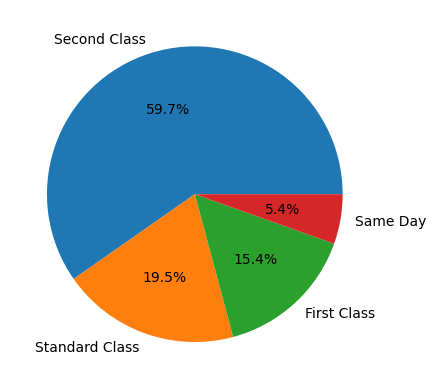

In [67]:
lb = df['Ship Mode'].unique()
data = df['Ship Mode'].value_counts()
plt.pie(data, labels=lb, autopct="%.1f%%")
plt.show()

## Exercise 4

จงวาดกราฟความถี่ แสดงจำนวนการขนส่งแต่ละแบบ ( Ship Mode ) พร้อมตกแต่งให้สวยงาม

(array([1., 1., 1., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 264.,  537.,  810., 1083., 1356., 1629., 1902., 2175., 2448.,
        2721., 2994.]),
 <BarContainer object of 10 artists>)

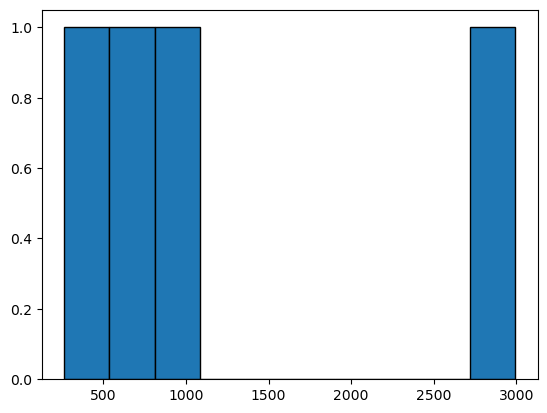

In [171]:
plt.hist(df.groupby('Order ID')['Ship Mode'].unique().value_counts(), ec = "k")

## Exercise 5

จงวาดกราฟจุด(Scatter) แสดงราคาขายกับกำไรที่ได้ (Sales , Profit) พร้อมตกแต่งให้สวยงาม

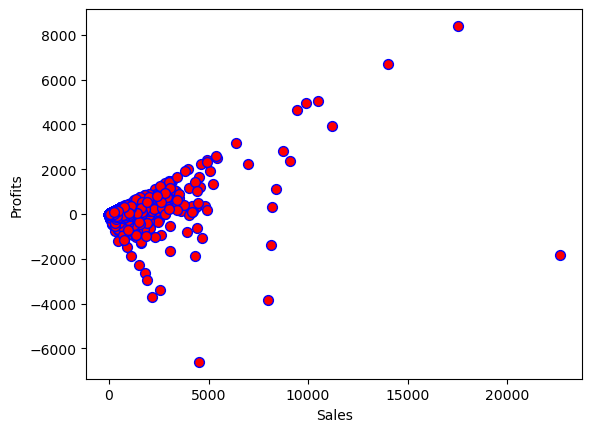

In [144]:
x = df['Sales']
y = df['Profit']
plt.xlabel("Sales")
plt.ylabel("Profits")
plt.scatter(x, y, marker = 'o', c = 'r', s = 50, ec = 'b', lw = 1)